In [4]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tifffile as tiff
import cv2
import numpy as np
from csbdeep.utils import normalize
import sys
from pathlib import Path
from PIL import Image
import imageio.v3 as iio
from IPython.display import HTML, Video
from csbdeep.utils import normalize
import pandas as pd

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualize OABF Dataset (Astro)
In this notebook we're going to load the "Astro" of the OABF dataset. The dataset comprises 3 versions of the same footage:
1. *Raw* measurements
2. *Motion corrected* processed
3. *Cleaned* version obtained using DeepCad

In [8]:
dataset = DATASETS_DIR["oabf_astro"]
sample_dir = SAMPLE_DIR

raw_file = dataset / "raw_data/tSer_00001.tif"

motion_corrected_file = dataset / "motion_corrected/M2P_astro_OF_001_concatenate_corrected_aligned.tiff"
motion_corrected_sample_file = sample_dir / "motion_corrected" / "oabf_astro.tiff"

deepcad_file = dataset / "denoised/M2P_astro_OF_001_concatenate_corrected_alignedf_E_05_Iter_6048_output.tif"
deepcad_sample_file = sample_dir / "deepcad" / "oabf_astro.tiff"

## Extract Samples

### 1. Raw measurement

In [ ]:
# 3m
raw = Recording(raw_file)

### 2. Motion corrected

In [ ]:
# 40s
motion_corrected = Recording(motion_corrected_file)
motion_corrected.save_sample(motion_corrected_sample_file)

### 3. Denoised with DeepCAD
> Note: the deepCAD file is 3 times longer than the first two ($10,120$ against $3,360$).

In [ ]:
deepcad = Recording(deepcad_file)
deepcad.save_sample(deepcad_sample_file)

### Overview of the extracted samples

In [ ]:
for i in [0, 1008, 2016]:
    raw = np.load(open(f"{sample_dir}/raw/oabf_{i}.npy", "rb"))
    motion_corrected = np.load(open(f"{sample_dir}/motion_corrected/oabf_{i}.npy", "rb"))
    deepcad = np.load(open(f"{sample_dir}/deepcad/oabf_{i}.npy", "rb"))
    imshow({"Raw": raw, "Motion Corrected": motion_corrected, "DeepCAD": deepcad}, size=3)

## Visualize values distribution

The values distribution is exponential

In [9]:
motion_corrected = Recording(motion_corrected_sample_file)
deepcad = Recording(deepcad_sample_file)

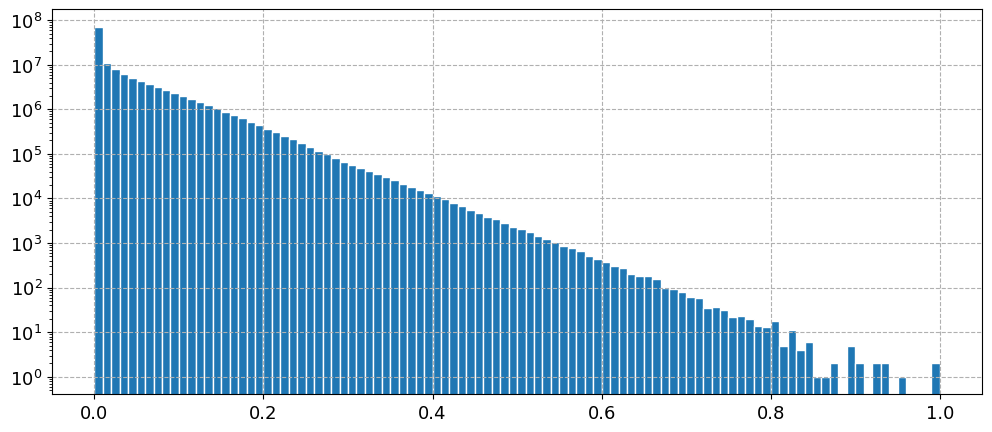

In [11]:
pd.Series(motion_corrected.video.flatten()).hist(figsize=(12, 5), bins=100,edgecolor='white')
plt.yscale("log")

## Export motion corrected slice as video

In [ ]:
filename="astro_motion_corrected.mp4"
motion_corrected.render(filename)
Video(filename)

In [15]:
filename="astro_deepcad_theirs.mp4"
deepcad.render(filename)
Video(filename)